In [1]:
import numpy as np
import pandas as pd
import pickle
import sys
sys.path.append("..")
sys.path.append("../d2c/")
# Generating random data for the test
np.random.seed(42)  # Seed for reproducibility
from utils import print_dag, dag_to_formula, show_dag, make_name
from d2c import D2C



In [2]:
# with open('../data/ts_test.pkl', 'rb') as f:
#     observations, dags, updated_dags = pickle.load(f)



In [3]:
with open('../data/dag_test.pkl', 'rb') as f:
    observations, dags = pickle.load(f)



In [4]:
chosen = 0

In [5]:
dag = dags[chosen]
observation = observations[chosen]
# updated_dag = updated_dags[chosen]

In [6]:
print_dag(dag)

####################
Node 0 has attributes {'bias': 0, 'sigma': 0.001, 'seed': 42}
Node 1 has attributes {'bias': 0, 'sigma': 0.001, 'seed': 42}
Node 2 has attributes {'bias': 0, 'sigma': 0.001, 'seed': 42}
Node 3 has attributes {'bias': 0, 'sigma': 0.001, 'seed': 42}
Node 4 has attributes {'bias': 0, 'sigma': 0.001, 'seed': 42}
Node 5 has attributes {'bias': 0, 'sigma': 0.001, 'seed': 42}
Node 6 has attributes {'bias': 0, 'sigma': 0.001, 'seed': 42}
Node 7 has attributes {'bias': 0, 'sigma': 0.001, 'seed': 42}
Node 8 has attributes {'bias': 0, 'sigma': 0.001, 'seed': 42}
Node 9 has attributes {'bias': 0, 'sigma': 0.001, 'seed': 42}
Edge 0 -> 7 has attributes {'weight': 0.16572, 'H': 'linear'}
Edge 1 -> 7 has attributes {'weight': -0.45135, 'H': 'linear'}
Edge 3 -> 0 has attributes {'weight': 0.28896, 'H': 'linear'}
Edge 3 -> 2 has attributes {'weight': -0.26231, 'H': 'linear'}
Edge 3 -> 7 has attributes {'weight': 0.32949, 'H': 'linear'}
Edge 4 -> 0 has attributes {'weight': -0.05568,

In [7]:
dag_to_formula(dag)

1 = 0
3 = 0
9 = 0
6 = 0.22073*9 + 0
5 = 0.2756*6 + 0
8 = 0.10727*5 + 0
2 = -0.26231*3 + -0.03254*5 + -0.3729*8 + 0.05816*9 + 0
4 = -0.42409*8 + 0
0 = 0.28896*3 + -0.05568*4 + 0
7 = 0.16572*0 + -0.45135*1 + 0.32949*3 + 0.07077*6 + 0



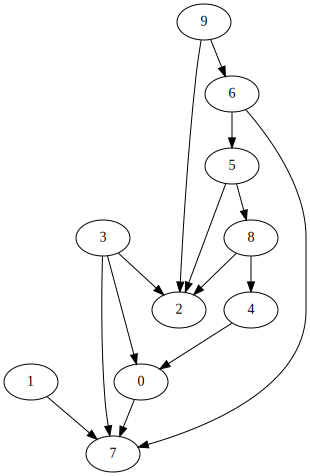

In [8]:
show_dag(dag)

In [9]:
# Test 1/4 MB with DAG, no constraint on MB_size 
# Test 2/4 MB with DAG, constraint on MB_size
# Test 3/4 MB without DAG, no constraint on MB_size
# Test 4/4 MB without DAG, constraint on MB_size

In [10]:
#Test 1

In [11]:
d2c = D2C(dags, observations)

In [12]:
mbs = []
for i in range(observations[chosen].shape[1]):
    print('MB for node', i, end=': ')
    result = d2c.compute_markov_blanket(chosen, observation,i, MB_size=10)
    mbs.append(result)
    print(result)


MB for node 0: [1, 3, 4, 6, 7]
MB for node 1: [0, 3, 6, 7]
MB for node 2: [8, 9, 3, 5]
MB for node 3: [0, 1, 2, 4, 5, 6, 7, 8, 9]
MB for node 4: [8, 0, 3]
MB for node 5: [2, 3, 6, 8, 9]
MB for node 6: [0, 1, 3, 5, 7, 9]
MB for node 7: [0, 1, 3, 6]
MB for node 8: [2, 3, 4, 5, 9]
MB for node 9: [2, 3, 5, 6, 8]


In [13]:
# Test 2

In [14]:
mbs = []
for i in range(observations[chosen].shape[1]):
    print('MB for node', i, end=': ')
    result = d2c.compute_markov_blanket(chosen, observation,i, MB_size=3)
    mbs.append(result)
    print(result)


MB for node 0: MB size is greater than MB_size
[3 7 4]
MB for node 1: MB size is greater than MB_size
[3 6 0]
MB for node 2: MB size is greater than MB_size
[5 8 9]
MB for node 3: MB size is greater than MB_size
[0 1 9]
MB for node 4: [8, 0, 3]
MB for node 5: MB size is greater than MB_size
[2 6 8]
MB for node 6: MB size is greater than MB_size
[3 9 7]
MB for node 7: MB size is greater than MB_size
[3 0 6]
MB for node 8: MB size is greater than MB_size
[3 4 9]
MB for node 9: MB size is greater than MB_size
[2 6 3]


In [15]:
#Test 3


In [16]:
d2c = D2C(None, observations)

In [17]:
mbs = []
for i in range(observations[chosen].shape[1]):
    # print('MB for node', i, end=': ')
    result = d2c.compute_markov_blanket(chosen, observation,i, MB_size=3)
    mbs.append(result)
    print(result)


Ind:  [1, 2, 3, 4, 5, 6, 7, 8, 9]
13:48:01 Iy:  [8.41494350e-05 4.77021945e-05 9.15150470e-05 5.72860560e-04
 1.27745849e-04 7.60293183e-05 6.23456655e-04 2.45737715e-04
 3.90165951e-05]
13:48:01 argsort:  [8 1 5 0 2 4 7 3 6]
13:48:01 reverse:  [6 3 7 4 2 0 5 1 8]
13:48:01 plus_one:  [7 4 8 5 3 1 6 2 9]
13:48:01 to_return:  [7 4 8 5 3 1 6 2 9]


IndexError: list index out of range